Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3589 - val_loss: 0.2055
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1972 - val_loss: 0.1769
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1731 - val_loss: 0.1587
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1568 - val_loss: 0.1476
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1471 - val_loss: 0.1405
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1401 - val_loss: 0.1351
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1352 - val_loss: 0.1317
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1322 - val_loss: 0.1292
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1297 - val_loss: 0.1276
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1284 - val_loss: 0.1267
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1273 - val_loss: 0.1259
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

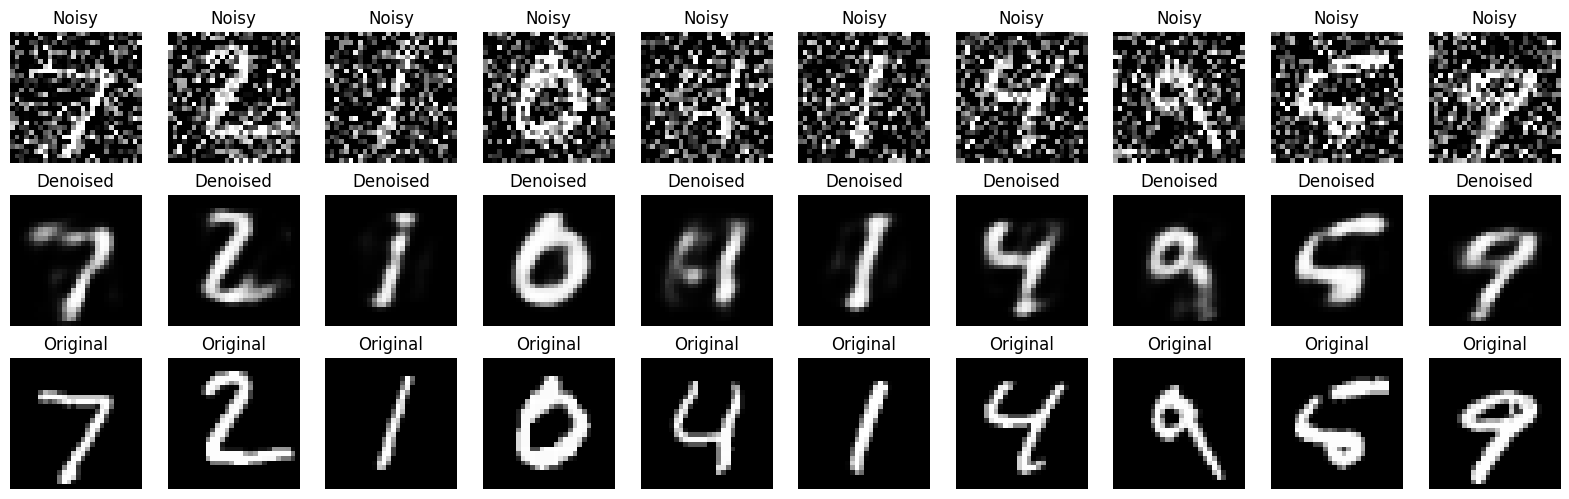

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=noise_factor, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=noise_factor, size=x_test.shape)

# Clip pixel values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the denoising autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model using noisy inputs and clean targets
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict on noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot noisy vs reconstructed images
n = 10  # how many digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Original clean image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()
